In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Henry\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Henry\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Mon Jan 27 20:26:09 2025).


In [2]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_CAN = df[(df['job_country'] == 'Canada') & (df['job_title_short'].isin(job_titles))].copy()

In [3]:
# Drop NaN values from Salary_year_avg column:

df_CAN = df_CAN.dropna(subset=['salary_hour_avg'])

In [4]:
job_list = [df_CAN[df_CAN['job_title_short'] == job_title]['salary_hour_avg'] for job_title in job_titles]

C:\Users\Henry\AppData\Local\Temp\ipykernel_17820\3414759213.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


Text(0.5, 1.0, 'Comparison of Hourly Salaries for Data Roles in Canada')

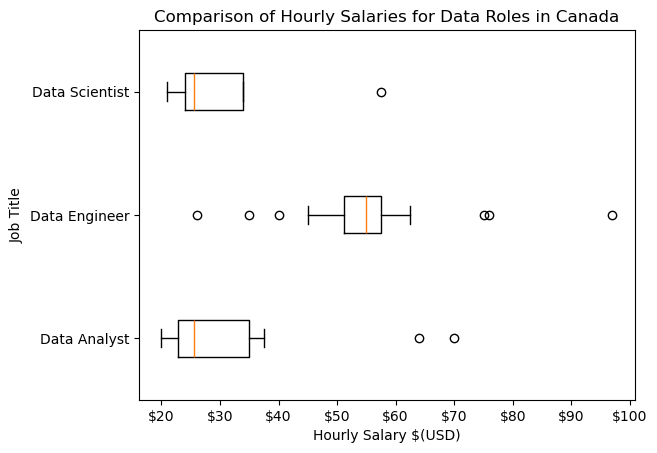

In [7]:
plt.boxplot(job_list, labels=job_titles, vert=False)

ax = plt.gca()

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x:,.0f}'))

plt.ylabel('Job Title')
plt.xlabel('Hourly Salary $(USD)')
plt.title('Comparison of Hourly Salaries for Data Roles in Canada')